# **Modeling**

# Part 1: Preparing the Data

In [128]:
import pandas as pd
import numpy as np
np.random.seed(4)
import os
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [129]:
os.getcwd()

'/workspace'

In [130]:
data = pd.read_csv('Crime_Clean2.csv')

In [131]:
data.head()

,Unnamed: 0,Incident ID,City,Police District Name,Block,Crime Name1,Crime Name2,Crime Name3,Victims,Place,...,Other Race %,Month,Day,Hour_Minute,Hour,Hour_Y,Hour_X,Time_of_Day,Season,Weekday
0,0,201268391,GAITHERSBURG,GERMANTOWN,7001011,Other,All Other Offenses,POLICE INFORMATION,1,Residence - Single Family,...,0.007143,12,2019-12-06,21:16,21,0.707107,-0.707107,Night,Fall,1.0
1,1,201234989,GAITHERSBURG,MONTGOMERY VILLAGE,7001011,Crime Against Person,Fondling,SEX OFFENSE - FONDLING,1,Residence - Single Family,...,0.007143,4,2019-04-13,02:00,2,0.866025,0.500000,Late Night,Spring,0.0
2,2,201281727,GAITHERSBURG,MONTGOMERY VILLAGE,7001011,Other,All Other Offenses,POLICE INFORMATION,1,Residence - Yard,...,0.007143,3,2020-03-13,09:09,9,-0.707107,0.707107,Morning,Winter,1.0
3,3,201265326,GAITHERSBURG,MONTGOMERY VILLAGE,7001011,Other,All Other Offenses,POLICE INFORMATION,1,Residence - Single Family,...,0.007143,11,2019-11-15,16:33,16,-0.500000,-0.866025,Late Afternoon/Early Evening,Fall,1.0
4,4,201090622,GAITHERSBURG,GERMANTOWN,7001011,Other,All Other Offenses,POLICE INFORMATION,1,Street - Other,...,0.007143,7,2016-07-22,22:27,22,0.866025,-0.500000,Night,Summer,1.0


In [132]:
len(data)

235368

In [133]:
data.isnull().sum()

Unnamed: 0                   0
Incident ID                  0
City                       828
Police District Name         0
Block                        0
Crime Name1                165
Crime Name2                165
Crime Name3                165
Victims                      0
Place                        0
Pop                          0
Income                       0
Age                          0
Educational Attainment       0
Bachelors                    0
High School                  0
Means of Transportation      0
Public Transportation        0
Total Laborforce             0
Total Unemployed             0
Start_Date_Time              0
Location                     0
Longitude                    0
Latitude                     0
Male                         0
Female                       0
Black                        0
White                        0
Asian                        0
American Indian              0
Other Race                   0
High School %                0
Bachelor

In [134]:
##Exclude rows for which Crime Name1 is null

data = data[~data['Crime Name1'].isnull()]

In [135]:
data.isnull().sum()

Unnamed: 0                   0
Incident ID                  0
City                       828
Police District Name         0
Block                        0
Crime Name1                  0
Crime Name2                  0
Crime Name3                  0
Victims                      0
Place                        0
Pop                          0
Income                       0
Age                          0
Educational Attainment       0
Bachelors                    0
High School                  0
Means of Transportation      0
Public Transportation        0
Total Laborforce             0
Total Unemployed             0
Start_Date_Time              0
Location                     0
Longitude                    0
Latitude                     0
Male                         0
Female                       0
Black                        0
White                        0
Asian                        0
American Indian              0
Other Race                   0
High School %                0
Bachelor

In [136]:
## Exclude Other category from Analysis

data = data[data['Crime Name1'] != 'Other']
data = data[data['Crime Name1'] != 'Not a Crime']

In [137]:
classes_gen = data['Crime Name1'].value_counts()

top_classes_gen = list(classes_gen.index.values)

top_classes_gen = sorted(top_classes_gen)
top_classes_gen

['Crime Against Person', 'Crime Against Property', 'Crime Against Society']

In [138]:
data = data.drop(['Unnamed: 0','Educational Attainment','Bachelors','High School','Means of Transportation','Public Transportation',
          'Total Laborforce','Total Unemployed', 'Crime Name2','Male','Female','Black','White','Asian','Other Race',
                 'American Indian','Male %', 'Female %','American Indian %', 'Other Race %', 'Asian %','Month','Hour_Minute','Season',
                 'Hour_X','Hour_Y','Hour','City'],1)

In [139]:
data.columns

Index(['Incident ID', 'Police District Name', 'Block', 'Crime Name1',
       'Crime Name3', 'Victims', 'Place', 'Pop', 'Income', 'Age',
       'Start_Date_Time', 'Location', 'Longitude', 'Latitude', 'High School %',
       'Bachelors %', 'Public Transportation %', 'Unemployed %', 'White %',
       'Black %', 'Day', 'Time_of_Day', 'Weekday'],
      dtype='object')

In [140]:
data['Crimes Against Society Count'] = 0
data['Crimes Against Property Count'] = 0
data['Crimes Against Persons Count'] = 0

In [141]:
df = data.groupby(['Day']).size().reset_index(name='Count')
df

,Day,Count
0,2016-07-01,200
1,2016-07-02,146
2,2016-07-03,119
3,2016-07-04,99
4,2016-07-05,139
...,...,...
1676,2021-02-01,45
1677,2021-02-02,57
1678,2021-02-03,64
1679,2021-02-04,50


In [142]:
df2 = data.groupby(['Day','Crime Name1']).size().reset_index(name='Count')
df2

,Day,Crime Name1,Count
0,2016-07-01,Crime Against Person,21
1,2016-07-01,Crime Against Property,112
2,2016-07-01,Crime Against Society,67
3,2016-07-02,Crime Against Person,19
4,2016-07-02,Crime Against Property,58
...,...,...,...
5038,2021-02-04,Crime Against Property,40
5039,2021-02-04,Crime Against Society,8
5040,2021-02-05,Crime Against Person,1
5041,2021-02-05,Crime Against Property,5


In [143]:
df2 = data[data['Crime Name1'] == 'Crime Against Person'].groupby(['Day']).size().reset_index(name='Crime Against Person Count')
df2

,Day,Crime Against Person Count
0,2016-07-01,21
1,2016-07-02,19
2,2016-07-03,15
3,2016-07-04,15
4,2016-07-05,18
...,...,...
1676,2021-02-01,5
1677,2021-02-02,7
1678,2021-02-03,8
1679,2021-02-04,2


In [144]:
df2b = data[data['Crime Name1'] == 'Crime Against Property'].groupby(['Day']).size().reset_index(name='Crime Against Property Count')
df2b

,Day,Crime Against Property Count
0,2016-07-01,112
1,2016-07-02,58
2,2016-07-03,58
3,2016-07-04,46
4,2016-07-05,82
...,...,...
1676,2021-02-01,34
1677,2021-02-02,47
1678,2021-02-03,53
1679,2021-02-04,40


In [145]:
df2c = data[data['Crime Name1'] == 'Crime Against Society'].groupby(['Day']).size().reset_index(name='Crime Against Society Count')
df2c

,Day,Crime Against Society Count
0,2016-07-01,67
1,2016-07-02,69
2,2016-07-03,46
3,2016-07-04,38
4,2016-07-05,39
...,...,...
1676,2021-02-01,6
1677,2021-02-02,3
1678,2021-02-03,3
1679,2021-02-04,8


In [146]:
df3 = data.groupby(['Day','Place']).size().reset_index(name='Count')
df3

,Day,Place,Count
0,2016-07-01,Bank - ATM,5
1,2016-07-01,Bank/S&L/Credit Union,2
2,2016-07-01,Commercial - Office Building,4
3,2016-07-01,Convenience Store,1
4,2016-07-01,Gas Station,1
...,...,...,...
51467,2021-02-05,Commercial - Office Building,1
51468,2021-02-05,Convenience Store,2
51469,2021-02-05,Other/Unknown,2
51470,2021-02-05,Residence - Single Family,1


In [147]:
df4 = data.groupby(['Day','Time_of_Day']).size().reset_index(name='Count')
df4

,Day,Time_of_Day,Count
0,2016-07-01,Afternoon,45
1,2016-07-01,Early Morning,7
2,2016-07-01,Late Afternoon/Early Evening,27
3,2016-07-01,Late Night,46
4,2016-07-01,Morning,33
...,...,...,...
10053,2021-02-04,Morning,5
10054,2021-02-04,Night,8
10055,2021-02-05,Afternoon,1
10056,2021-02-05,Late Night,3


In [148]:
df5 = data.groupby(['Day','Weekday']).size().reset_index(name='Count')
df5

,Day,Weekday,Count
0,2016-07-01,1.0,200
1,2016-07-02,0.0,146
2,2016-07-03,0.0,119
3,2016-07-04,1.0,99
4,2016-07-05,1.0,139
...,...,...,...
1676,2021-02-01,1.0,45
1677,2021-02-02,1.0,57
1678,2021-02-03,1.0,64
1679,2021-02-04,1.0,50


In [149]:
df6 = data.groupby(['Day'])
df6b = df6['Income'].mean().reset_index(name='Mean Income')
df6b


,Day,Mean Income
0,2016-07-01,106514.025000
1,2016-07-02,98466.287671
2,2016-07-03,103432.134454
3,2016-07-04,100306.131313
4,2016-07-05,105139.136691
...,...,...
1676,2021-02-01,112109.111111
1677,2021-02-02,131124.070175
1678,2021-02-03,104034.656250
1679,2021-02-04,119877.500000


In [150]:
df6c = df6['Pop'].mean().reset_index(name='Mean Pop')
df6c

,Day,Mean Pop
0,2016-07-01,2144.675000
1,2016-07-02,2088.417808
2,2016-07-03,2457.554622
3,2016-07-04,2180.292929
4,2016-07-05,2034.438849
...,...,...
1676,2021-02-01,2029.088889
1677,2021-02-02,1933.000000
1678,2021-02-03,2027.640625
1679,2021-02-04,1990.660000


In [151]:
df6d = df6['Public Transportation %'].mean().reset_index(name='Mean Public Transportation %')
df6d

,Day,Mean Public Transportation %
0,2016-07-01,0.184065
1,2016-07-02,0.159419
2,2016-07-03,0.165274
3,2016-07-04,0.186869
4,2016-07-05,0.185366
...,...,...
1676,2021-02-01,0.180293
1677,2021-02-02,0.163171
1678,2021-02-03,0.172570
1679,2021-02-04,0.134308


In [152]:
df6e = df6['Victims'].mean().reset_index(name='Mean Victims')
df6e

,Day,Mean Victims
0,2016-07-01,1.030000
1,2016-07-02,1.041096
2,2016-07-03,1.033613
3,2016-07-04,1.070707
4,2016-07-05,1.014388
...,...,...
1676,2021-02-01,1.000000
1677,2021-02-02,1.070175
1678,2021-02-03,1.031250
1679,2021-02-04,1.000000


In [153]:
df_final = pd.merge(df, df6b, how='left', on=['Day'])
df_final.head()

,Day,Count,Mean Income
0,2016-07-01,200,106514.025000
1,2016-07-02,146,98466.287671
2,2016-07-03,119,103432.134454
3,2016-07-04,99,100306.131313
4,2016-07-05,139,105139.136691


In [154]:
df_final = pd.merge(df_final, df6c, how='left', on=['Day'])
df_final = pd.merge(df_final, df6d, how='left', on=['Day'])
df_final = pd.merge(df_final, df6e, how='left', on=['Day'])
df_final.head()

,Day,Count,Mean Income,Mean Pop,Mean Public Transportation %,Mean Victims
0,2016-07-01,200,106514.025000,2144.675000,0.184065,1.030000
1,2016-07-02,146,98466.287671,2088.417808,0.159419,1.041096
2,2016-07-03,119,103432.134454,2457.554622,0.165274,1.033613
3,2016-07-04,99,100306.131313,2180.292929,0.186869,1.070707
4,2016-07-05,139,105139.136691,2034.438849,0.185366,1.014388


In [155]:
df_final2 = pd.merge(df_final,df2, how='left', on=['Day'])
df_final2

,Day,Count,Mean Income,Mean Pop,Mean Public Transportation %,Mean Victims,Crime Against Person Count
0,2016-07-01,200,106514.025000,2144.675000,0.184065,1.030000,21
1,2016-07-02,146,98466.287671,2088.417808,0.159419,1.041096,19
2,2016-07-03,119,103432.134454,2457.554622,0.165274,1.033613,15
3,2016-07-04,99,100306.131313,2180.292929,0.186869,1.070707,15
4,2016-07-05,139,105139.136691,2034.438849,0.185366,1.014388,18
...,...,...,...,...,...,...,...
1676,2021-02-01,45,112109.111111,2029.088889,0.180293,1.000000,5
1677,2021-02-02,57,131124.070175,1933.000000,0.163171,1.070175,7
1678,2021-02-03,64,104034.656250,2027.640625,0.172570,1.031250,8
1679,2021-02-04,50,119877.500000,1990.660000,0.134308,1.000000,2


In [156]:
df_final2 = pd.merge(df_final2,df2b, how='left', on=['Day'])
df_final2

,Day,Count,Mean Income,Mean Pop,Mean Public Transportation %,Mean Victims,Crime Against Person Count,Crime Against Property Count
0,2016-07-01,200,106514.025000,2144.675000,0.184065,1.030000,21,112
1,2016-07-02,146,98466.287671,2088.417808,0.159419,1.041096,19,58
2,2016-07-03,119,103432.134454,2457.554622,0.165274,1.033613,15,58
3,2016-07-04,99,100306.131313,2180.292929,0.186869,1.070707,15,46
4,2016-07-05,139,105139.136691,2034.438849,0.185366,1.014388,18,82
...,...,...,...,...,...,...,...,...
1676,2021-02-01,45,112109.111111,2029.088889,0.180293,1.000000,5,34
1677,2021-02-02,57,131124.070175,1933.000000,0.163171,1.070175,7,47
1678,2021-02-03,64,104034.656250,2027.640625,0.172570,1.031250,8,53
1679,2021-02-04,50,119877.500000,1990.660000,0.134308,1.000000,2,40


In [157]:
df_final2 = pd.merge(df_final2,df2c, how='left', on=['Day'])
df_final2

,Day,Count,Mean Income,Mean Pop,Mean Public Transportation %,Mean Victims,Crime Against Person Count,Crime Against Property Count,Crime Against Society Count
0,2016-07-01,200,106514.025000,2144.675000,0.184065,1.030000,21,112,67
1,2016-07-02,146,98466.287671,2088.417808,0.159419,1.041096,19,58,69
2,2016-07-03,119,103432.134454,2457.554622,0.165274,1.033613,15,58,46
3,2016-07-04,99,100306.131313,2180.292929,0.186869,1.070707,15,46,38
4,2016-07-05,139,105139.136691,2034.438849,0.185366,1.014388,18,82,39
...,...,...,...,...,...,...,...,...,...
1676,2021-02-01,45,112109.111111,2029.088889,0.180293,1.000000,5,34,6
1677,2021-02-02,57,131124.070175,1933.000000,0.163171,1.070175,7,47,3
1678,2021-02-03,64,104034.656250,2027.640625,0.172570,1.031250,8,53,3
1679,2021-02-04,50,119877.500000,1990.660000,0.134308,1.000000,2,40,8


In [158]:
def func(data, df_final):
    
    for place in np.unique(data['Place']):
        
        df2 = data[data['Place'] == place].groupby(['Day']).size().reset_index(name=place + " Count")
        df_final = pd.merge(df_final,df2, how='left', on=['Day'])
        
    return df_final

In [159]:
df_final3 = func(data,df_final2)
df_final3.shape

(1681, 92)

In [160]:
df_final3.head()

,Day,Count,Mean Income,Mean Pop,Mean Public Transportation %,Mean Victims,Crime Against Person Count,Crime Against Property Count,Crime Against Society Count,Air/Bus/Train/Metro Terminal Count,...,Retail - Video Store Count,School/College Count,Street - Alley Count,Street - Bus Stop Count,Street - Commercial Count,Street - In vehicle Count,Street - Other Count,Street - Residential Count,Theater Count,Wooded Area Count
0,2016-07-01,200,106514.025000,2144.675000,0.184065,1.030000,21,112,67,NaN,...,NaN,1.0,1.0,4.0,7.0,17.0,2.0,15.0,1.0,NaN
1,2016-07-02,146,98466.287671,2088.417808,0.159419,1.041096,19,58,69,NaN,...,NaN,NaN,1.0,5.0,9.0,30.0,4.0,14.0,NaN,NaN
2,2016-07-03,119,103432.134454,2457.554622,0.165274,1.033613,15,58,46,NaN,...,NaN,2.0,1.0,1.0,4.0,24.0,4.0,7.0,1.0,1.0
3,2016-07-04,99,100306.131313,2180.292929,0.186869,1.070707,15,46,38,NaN,...,NaN,NaN,NaN,NaN,3.0,17.0,1.0,12.0,NaN,NaN
4,2016-07-05,139,105139.136691,2034.438849,0.185366,1.014388,18,82,39,NaN,...,NaN,NaN,NaN,3.0,NaN,14.0,3.0,8.0,NaN,NaN


In [161]:
len(df_final3)

1681

In [162]:
data = df_final3.copy()

In [163]:
data['30 Rolling Crimes Against Society Count'] = 0
data['30 Rolling Crimes Against Property Count'] = 0
data['30 Rolling Crimes Against Persons Count'] = 0
data['7 Rolling Crimes Against Society Count'] = 0
data['7 Rolling Crimes Against Property Count'] = 0
data['7 Rolling Crimes Against Persons Count'] = 0
data['1 Rolling Crimes Against Society Count'] = 0
data['1 Rolling Crimes Against Property Count'] = 0
data['1 Rolling Crimes Against Persons Count'] = 0

In [164]:
def cluster_func(data):
        
        data['30 Rolling Crimes Against Society Count'] = data['Crime Against Society Count'].rolling(30).mean()
        data['30 Rolling Crimes Against Property Count'] = data['Crime Against Property Count'].rolling(30).mean()
        data['30 Rolling Crimes Against Persons Count'] = data['Crime Against Person Count'].rolling(30).mean()
        
        data['7 Rolling Crimes Against Society Count'] = data['Crime Against Society Count'].rolling(7).mean()
        data['7 Rolling Crimes Against Property Count'] = data['Crime Against Property Count'].rolling(7).mean()
        data['7 Rolling Crimes Against Persons Count'] = data['Crime Against Person Count'].rolling(7).mean()
        

        data['2 Rolling Crimes Against Society Count'] = data['Crime Against Society Count'].rolling(2).mean()
        data['2 Rolling Crimes Against Property Count'] = data['Crime Against Property Count'].rolling(2).mean()
        data['2 Rolling Crimes Against Persons Count'] = data['Crime Against Person Count'].rolling(2).mean()
        
        return data

In [165]:
data_final = cluster_func(data)

In [166]:
len(data_final)

1681

In [167]:
data_final.head(9)

,Day,Count,Mean Income,Mean Pop,Mean Public Transportation %,Mean Victims,Crime Against Person Count,Crime Against Property Count,Crime Against Society Count,Air/Bus/Train/Metro Terminal Count,...,30 Rolling Crimes Against Persons Count,7 Rolling Crimes Against Society Count,7 Rolling Crimes Against Property Count,7 Rolling Crimes Against Persons Count,1 Rolling Crimes Against Society Count,1 Rolling Crimes Against Property Count,1 Rolling Crimes Against Persons Count,2 Rolling Crimes Against Society Count,2 Rolling Crimes Against Property Count,2 Rolling Crimes Against Persons Count
0,2016-07-01,200,106514.025000,2144.675000,0.184065,1.030000,21,112,67,NaN,...,NaN,NaN,NaN,NaN,0,0,0,NaN,NaN,NaN
1,2016-07-02,146,98466.287671,2088.417808,0.159419,1.041096,19,58,69,NaN,...,NaN,NaN,NaN,NaN,0,0,0,68.0,85.0,20.0
2,2016-07-03,119,103432.134454,2457.554622,0.165274,1.033613,15,58,46,NaN,...,NaN,NaN,NaN,NaN,0,0,0,57.5,58.0,17.0
3,2016-07-04,99,100306.131313,2180.292929,0.186869,1.070707,15,46,38,NaN,...,NaN,NaN,NaN,NaN,0,0,0,42.0,52.0,15.0
4,2016-07-05,139,105139.136691,2034.438849,0.185366,1.014388,18,82,39,NaN,...,NaN,NaN,NaN,NaN,0,0,0,38.5,64.0,16.5
5,2016-07-06,142,98814.795775,2193.971831,0.162601,1.021127,14,81,47,NaN,...,NaN,NaN,NaN,NaN,0,0,0,43.0,81.5,16.0
6,2016-07-07,116,114520.681034,2160.137931,0.166828,1.077586,14,65,37,NaN,...,NaN,49.000000,71.714286,16.571429,0,0,0,42.0,73.0,14.0
7,2016-07-08,118,100957.923729,2416.169492,0.198177,1.016949,13,63,42,1.0,...,NaN,45.428571,64.714286,15.428571,0,0,0,39.5,64.0,13.5
8,2016-07-09,92,96765.489130,2086.793478,0.169123,1.010870,9,46,37,NaN,...,NaN,40.857143,63.000000,14.000000,0,0,0,39.5,54.5,11.0


In [168]:
data_final.columns

Index(['Day', 'Count', 'Mean Income', 'Mean Pop',
       'Mean Public Transportation %', 'Mean Victims',
       'Crime Against Person Count', 'Crime Against Property Count',
       'Crime Against Society Count', 'Air/Bus/Train/Metro Terminal Count',
       ...
       '30 Rolling Crimes Against Persons Count',
       '7 Rolling Crimes Against Society Count',
       '7 Rolling Crimes Against Property Count',
       '7 Rolling Crimes Against Persons Count',
       '1 Rolling Crimes Against Society Count',
       '1 Rolling Crimes Against Property Count',
       '1 Rolling Crimes Against Persons Count',
       '2 Rolling Crimes Against Society Count',
       '2 Rolling Crimes Against Property Count',
       '2 Rolling Crimes Against Persons Count'],
      dtype='object', length=104)

In [169]:
data_final['30 Rolling Crimes Against Property Count'].isnull().sum()

29

In [170]:
data.replace([np.inf, -np.inf], np.nan, inplace=True)
data.fillna(0,inplace=True)

In [171]:
data['30 Rolling Crimes Against Property Count'].isnull().sum()

0

In [172]:
label1 = np.array(data['Crime Against Society Count'])
label2 = np.array(data['Crime Against Property Count'])
label3 = np.array(data['Crime Against Person Count'])

In [173]:
data['Day'] = pd.to_datetime(data['Day'])

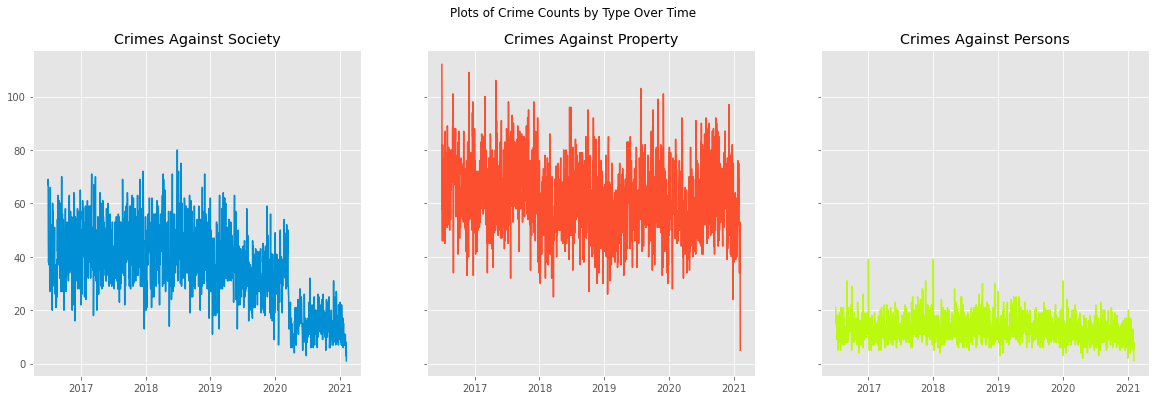

In [174]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(20,6), sharex=True, sharey=True)

fig.suptitle('Plots of Crime Counts by Type Over Time')

ax1.plot(data['Day'], data['Crime Against Society Count'], c = '#008fd5')
ax1.set_title('Crimes Against Society')

ax2.plot(data['Day'], data['Crime Against Property Count'], c = '#fc4f30')
ax2.set_title('Crimes Against Property')

ax3.plot(data['Day'], data['Crime Against Person Count'], c = '#bbf90f')
ax3.set_title('Crimes Against Persons')

plt.show()


In [175]:
features = data.copy()

In [176]:
data = data.drop(['Count','Crime Against Society Count','Crime Against Property Count', 'Crime Against Person Count'],axis=1)

In [179]:
data = data.drop('Day',axis=1)

In [180]:
from sklearn.model_selection import train_test_split

train, test, train_labels, test_labels = train_test_split(data,label1, test_size=0.25)

In [181]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()

model.fit(train, train_labels)

RandomForestRegressor()

In [182]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
predictions = model.predict(test)
mean_absolute_error(test_labels, predictions)

3.96064133016627

In [183]:
errors = abs(predictions - test_labels)
np.mean(errors)

3.96064133016627

In [184]:
mean_squared_error(test_labels, predictions)

33.316414014251784

In [185]:
mean_absolute_percentage_error(test_labels, predictions)

0.12474037725404574

In [186]:
mape = np.mean(100*(errors/test_labels))
accuracy = 100 - mape
accuracy

87.52596227459543

In [ ]:
importances1 = list(model.feature_importances_)
feature_list1 = list(data.columns)
feature_importances1 = [(feature, importance) for feature, importance in zip(feature_list1,importances1)]
feature_importances1 = sorted(feature_importances1, key = lambda x: x[1], reverse=True)

In [ ]:
def plotImportances(top_importances, top_features_list):
    x_values = list(range(len(top_importances)))
    plt.bar(x_values, top_importances, orientation= 'vertical')
    plt.xticks(x_values, top_features_list, rotation = 'vertical')
    plt.ylabel('Importance')
    plt.xlabel('Variable')
    plt.title('Top Variable Importances')
    fig = plt.gcf()
    fig.set_size_inches(7,7)
    plt.show()

In [ ]:
def getImportances(feature_importances):
    top_importances = []
    top_features_list = []

    for x,y in feature_importances:
        if(y > 0.015):
            top_features_list.append(x)
            top_importances.append(y)
    return top_features_list, top_importances

In [ ]:
top_features_list1, top_importances1 = getImportances(feature_importances1)

In [ ]:
plotImportances(top_importances1, top_features_list1)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold

param_grid_orig = {
    'n_estimators': np.linspace(10,200).astype(int),
    'max_depth': list(np.linspace(3,30).astype(int)),
    'max_features': ['auto','sqrt'] + list(np.arange(0.3,1,0.1)),
    'max_leaf_nodes': list(np.linspace(10,50,500).astype(int)),
    'min_samples_split': [2,5,10,15,20],
    'bootstrap': [True,False]
}

estimator = RandomForestRegressor(random_state=4)

rs = RandomizedSearchCV(estimator, param_grid_orig, n_jobs=-1, cv=KFold(5, shuffle=False), n_iter=5)

rs.fit(train, train_labels)

In [ ]:
best_model = rs.best_estimator_
predictions = best_model.predict(test)
mean_absolute_error(test_labels, predictions)

In [ ]:
importances1 = list(best_model.feature_importances_)
feature_list1 = list(data.columns)
feature_importances1 = [(feature, importance) for feature, importance in zip(feature_list1,importances1)]
feature_importances1 = sorted(feature_importances1, key = lambda x: x[1], reverse=True)

In [ ]:
top_features_list1, top_importances1 = getImportances(feature_importances1)

In [ ]:
plotImportances(top_importances1, top_features_list1)

In [199]:
test_features = features[1260:]
test_features.head()

,Day,Count,Mean Income,Mean Pop,Mean Public Transportation %,Mean Victims,Crime Against Person Count,Crime Against Property Count,Crime Against Society Count,Air/Bus/Train/Metro Terminal Count,...,30 Rolling Crimes Against Persons Count,7 Rolling Crimes Against Society Count,7 Rolling Crimes Against Property Count,7 Rolling Crimes Against Persons Count,1 Rolling Crimes Against Society Count,1 Rolling Crimes Against Property Count,1 Rolling Crimes Against Persons Count,2 Rolling Crimes Against Society Count,2 Rolling Crimes Against Property Count,2 Rolling Crimes Against Persons Count
1260,2019-12-13,110,104451.072727,2250.872727,0.197867,1.018182,6,69,35,0.0,...,13.100000,27.000000,60.000000,10.714286,0,0,0,38.0,61.5,9.5
1261,2019-12-14,95,103590.378947,2175.421053,0.163199,1.052632,8,58,29,0.0,...,13.100000,28.285714,60.000000,10.142857,0,0,0,32.0,63.5,7.0
1262,2019-12-15,104,103074.721154,2108.298077,0.165762,1.019231,17,58,29,0.0,...,13.033333,30.000000,62.285714,11.428571,0,0,0,29.0,58.0,12.5
1263,2019-12-16,81,113627.333333,2178.172840,0.148358,1.037037,10,55,16,0.0,...,13.033333,29.571429,61.857143,11.285714,0,0,0,22.5,56.5,13.5
1264,2019-12-17,120,107348.933333,2228.141667,0.192701,1.025000,17,69,34,0.0,...,12.966667,31.428571,61.428571,11.714286,0,0,0,25.0,62.0,13.5


In [200]:
dates = test_features['Day']

In [201]:
len(dates)

421

In [202]:
len(predictions)

421

In [203]:
len(test_labels)

421

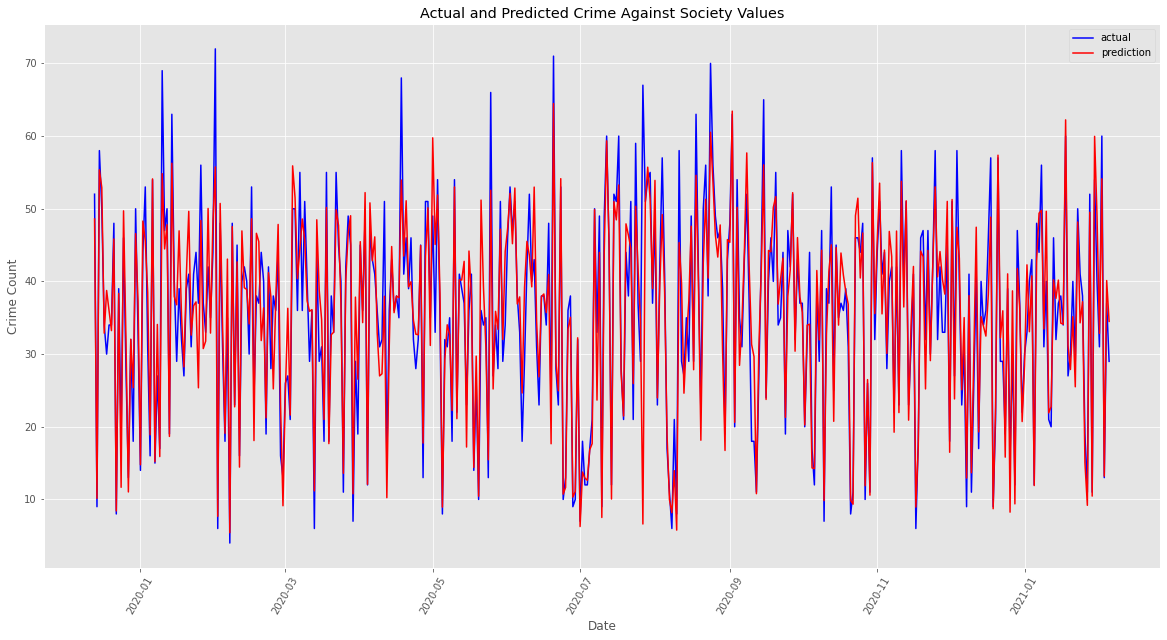

In [226]:
plt.plot(dates, test_labels, 'b-', label = 'actual')# Plot the predicted values
plt.plot(dates, predictions, 'r-', label = 'prediction')
plt.xticks(rotation = '60'); 
plt.legend()# Graph labels
plt.xlabel('Date'); plt.ylabel('Crime Count'); plt.title('Actual and Predicted Crime Against Society Values');
fig = plt.gcf()
fig.set_size_inches(20,10)
plt.show()

In [209]:
train2, test2, train_labels2, test_labels2 = train_test_split(data,label2, test_size=0.25)

In [210]:
model2 = RandomForestRegressor()

model2.fit(train2, train_labels2)

RandomForestRegressor()

In [212]:
predictions2 = model2.predict(test2)
mean_absolute_error(test_labels2, predictions2)

5.572589073634205

In [214]:
errors2 = abs(predictions2 - test_labels2)
np.mean(errors2)

5.572589073634205

In [215]:
mean_squared_error(test_labels2, predictions2)

49.57442280285035

In [216]:
mean_absolute_percentage_error(test_labels2, predictions2)

0.09713996594721098

In [217]:
mape2 = np.mean(100*(errors2/test_labels2))
accuracy2 = 100 - mape2
accuracy2

90.2860034052789

In [218]:
importances1 = list(model2.feature_importances_)
feature_list1 = list(data.columns)
feature_importances1 = [(feature, importance) for feature, importance in zip(feature_list1,importances1)]
feature_importances1 = sorted(feature_importances1, key = lambda x: x[1], reverse=True)

In [219]:
top_features_list1, top_importances1 = getImportances(feature_importances1)

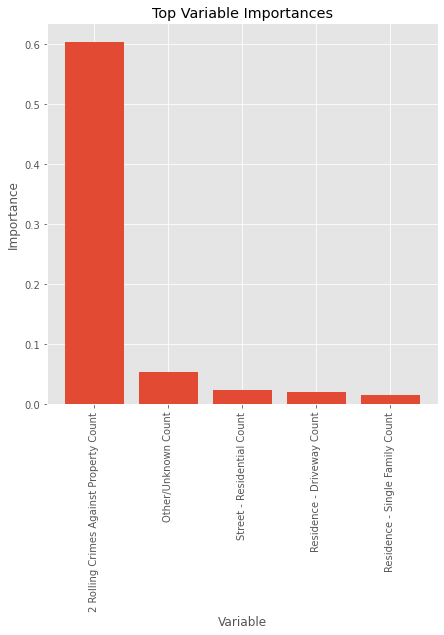

In [220]:
plotImportances(top_importances1, top_features_list1)

In [221]:
rs2 = RandomizedSearchCV(estimator, param_grid_orig, n_jobs=-1, cv=KFold(5, shuffle=False), n_iter=5)

rs2.fit(train2, train_labels2)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=RandomForestRegressor(random_state=4), n_iter=5,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [3, 3, 4, 4, 5, 5, 6, 6, 7,
                                                      7, 8, 9, 9, 10, 10, 11,
                                                      11, 12, 12, 13, 14, 14,
                                                      15, 15, 16, 16, 17, 17,
                                                      18, 18, ...],
                                        'max_features': ['auto', 'sqrt', 0.3,
                                                         0.4, 0.5,
                                                         0.6000000000000001,
                                                         0.7000000...
                                                         0.900000000000000

In [222]:
best_model2 = rs2.best_estimator_
predictions2 = best_model2.predict(test2)
mean_absolute_error(test_labels2, predictions2)

5.725076102948665

In [227]:
errors2 = abs(predictions2 - test_labels2)
np.mean(errors2)

5.725076102948665

In [228]:
mean_squared_error(test_labels2, predictions2)

51.18950335564425

In [229]:
mean_absolute_percentage_error(test_labels2, predictions2)

0.10178806795717632

In [230]:
mape2 = np.mean(100*(errors2/test_labels2))
accuracy2 = 100 - mape2
accuracy2

89.82119320428237

In [223]:
importances2 = list(best_model2.feature_importances_)
feature_list2 = list(data.columns)
feature_importances2 = [(feature, importance) for feature, importance in zip(feature_list2,importances2)]
feature_importances2 = sorted(feature_importances2, key = lambda x: x[1], reverse=True)

In [224]:
top_features_list2, top_importances2 = getImportances(feature_importances2)

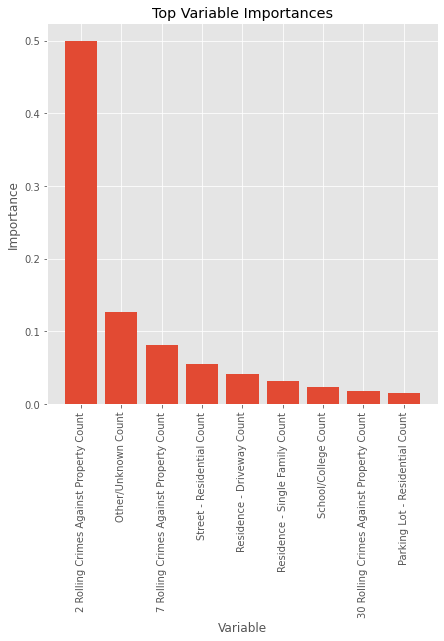

In [225]:
plotImportances(top_importances2, top_features_list2)

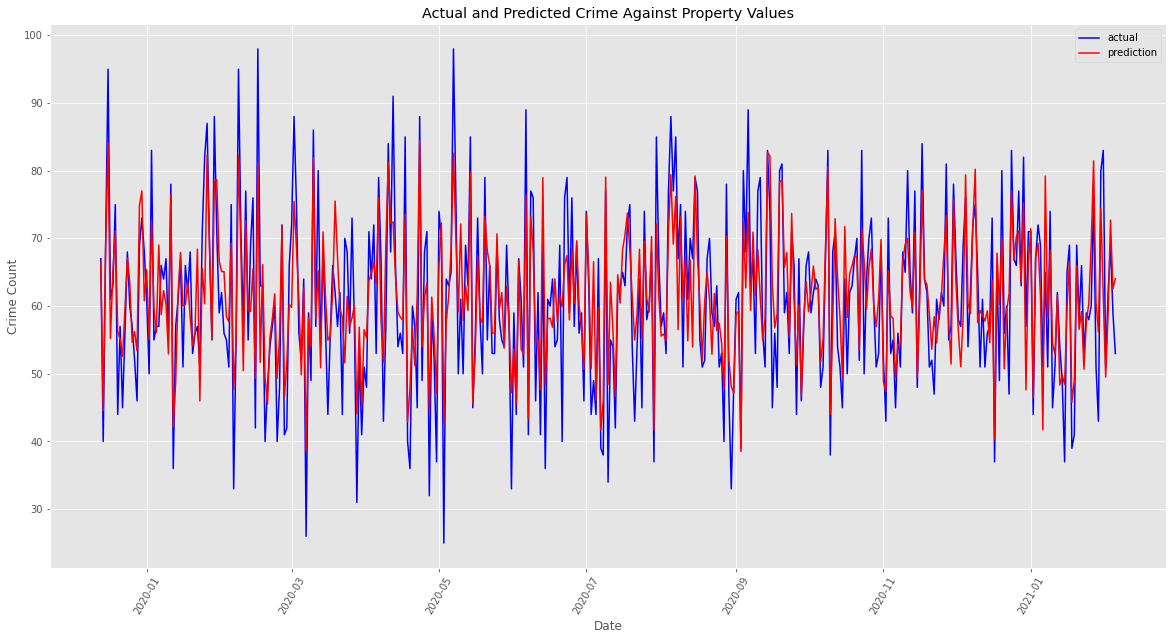

In [232]:
plt.plot(dates, test_labels2, 'b-', label = 'actual')# Plot the predicted values
plt.plot(dates, predictions2, 'r-', label = 'prediction')
plt.xticks(rotation = '60'); 
plt.legend()# Graph labels
plt.xlabel('Date'); plt.ylabel('Crime Count'); plt.title('Actual and Predicted Crime Against Property Values');
fig = plt.gcf()
fig.set_size_inches(20,10)
plt.show()

In [233]:
train3, test3, train_labels3, test_labels3 = train_test_split(data,label3, test_size=0.25)

In [234]:
model3 = RandomForestRegressor()

model3.fit(train3, train_labels3)

RandomForestRegressor()

In [235]:
predictions3 = model3.predict(test3)
mean_absolute_error(test_labels3, predictions3)

2.19353919239905

In [236]:
errors3 = abs(predictions3 - test_labels3)
np.mean(errors3)

2.19353919239905

In [237]:
mean_squared_error(test_labels3, predictions3)

7.883473159144893

In [238]:
mean_absolute_percentage_error(test_labels3, predictions3)

0.19262124711332856

In [240]:
mape3 = np.mean(100*(errors3/test_labels3))
accuracy3 = 100 - mape3
accuracy3

80.73787528866714

In [241]:
importances3 = list(model3.feature_importances_)
feature_list3 = list(data.columns)
feature_importances3 = [(feature, importance) for feature, importance in zip(feature_list3,importances3)]
feature_importances3 = sorted(feature_importances3, key = lambda x: x[1], reverse=True)

In [242]:
top_features_list3, top_importances3 = getImportances(feature_importances3)

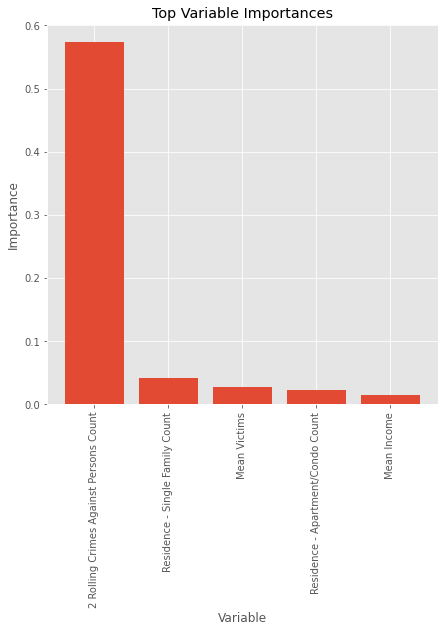

In [243]:
plotImportances(top_importances3, top_features_list3)

In [245]:
rs3 = RandomizedSearchCV(estimator, param_grid_orig, n_jobs=-1, cv=KFold(5, shuffle=False), n_iter=5)

rs3.fit(train3, train_labels3)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=RandomForestRegressor(random_state=4), n_iter=5,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [3, 3, 4, 4, 5, 5, 6, 6, 7,
                                                      7, 8, 9, 9, 10, 10, 11,
                                                      11, 12, 12, 13, 14, 14,
                                                      15, 15, 16, 16, 17, 17,
                                                      18, 18, ...],
                                        'max_features': ['auto', 'sqrt', 0.3,
                                                         0.4, 0.5,
                                                         0.6000000000000001,
                                                         0.7000000...
                                                         0.900000000000000

In [246]:
best_model3 = rs3.best_estimator_
predictions3 = best_model3.predict(test3)
mean_absolute_error(test_labels3, predictions3)

2.1403251825783567

In [247]:
errors3 = abs(predictions3 - test_labels3)
np.mean(errors3)

2.1403251825783567

In [248]:
mean_squared_error(test_labels3, predictions3)

7.372477561492266

In [249]:
mean_absolute_percentage_error(test_labels3, predictions3)

0.19525101458100286

In [250]:
mape3 = np.mean(100*(errors3/test_labels3))
accuracy3 = 100 - mape3
accuracy3

80.47489854189972

In [251]:
importances3 = list(best_model3.feature_importances_)
feature_list3 = list(data.columns)
feature_importances3 = [(feature, importance) for feature, importance in zip(feature_list3,importances3)]
feature_importances3 = sorted(feature_importances3, key = lambda x: x[1], reverse=True)

In [252]:
top_features_list3, top_importances3 = getImportances(feature_importances3)

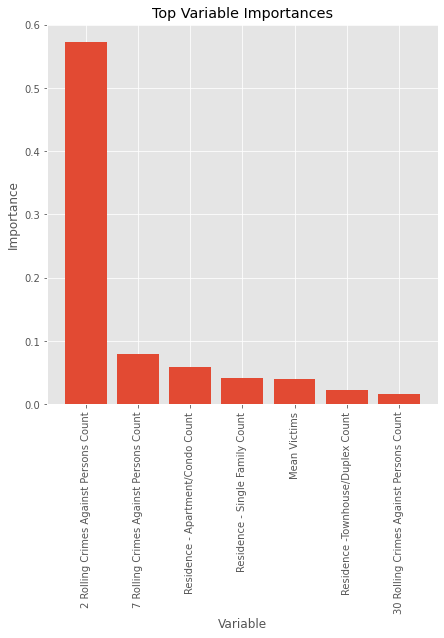

In [253]:
plotImportances(top_importances3, top_features_list3)

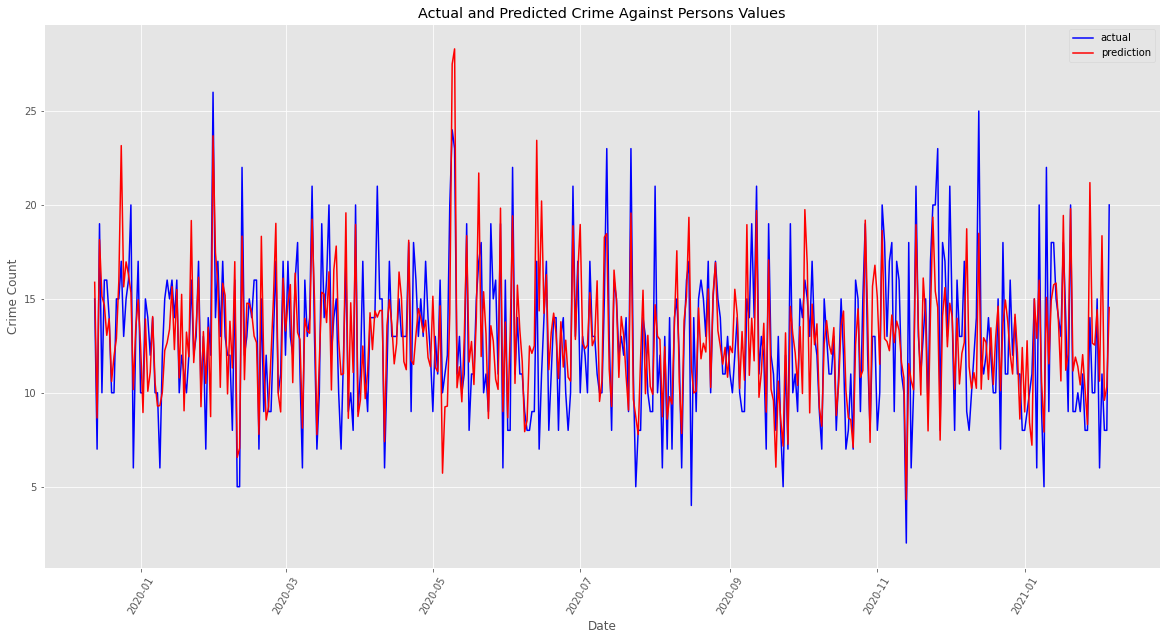

In [244]:
plt.plot(dates, test_labels3, 'b-', label = 'actual')# Plot the predicted values
plt.plot(dates, predictions3, 'r-', label = 'prediction')
plt.xticks(rotation = '60'); 
plt.legend()# Graph labels
plt.xlabel('Date'); plt.ylabel('Crime Count'); plt.title('Actual and Predicted Crime Against Persons Values');
fig = plt.gcf()
fig.set_size_inches(20,10)
plt.show()